In [ ]:
# C:\Users\hungh\AppData\Local\Programs\Python\Python37\py3_7_9_tfgpu\Scripts\activate
# RNN (Recurrent Neural Network) 순환 신경망으로, 시퀀스 데이터를 다루는 데 특화된 인공 신경망의 한 종류입니다. 
# -RNN은 순차적인 데이터(예: 시간에 따른 데이터, 텍스트 등)에서 이전 단계의 출력을 현재 단계의 입력으로 사용하는 순환 구조를 가지고 있어 시퀀스의 패턴을 학습하는 데 유리합니다.
# 단어는 독립적이다. 하나하나가 차원이다
# 주어 목적어 서술어
# 기억의 영역(장기, 단기). 해석의 영역. 상상의 영역. 합성의 영역. 한 256 * 256 이면 되려나 ㅎ
# LSTM(Long Short-Term Memory)은 순환 신경망(RNN)의 한 종류로, 특히 장기 의존성 문제를 해결하기 위해 고안된 모델입니다. 
# -RNN은 이전 입력을 기억해 시퀀스 데이터를 처리할 수 있지만, 긴 시퀀스를 다룰 때는 과거의 정보를 잘 유지하지 못하는 단점이 있습니다. LSTM은 이러한 문제를 극복하기 위해 개발되었습니다.

Epoch 1/100
31/31 [==============================] - 1s 3ms/step - loss: 0.1500
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 7.8298e-04
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 6.2272e-04
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 6.0392e-04
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 5.9925e-04
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 5.8116e-04
Epoch 8/100
31/31 [==============================] - 0s 4ms/step - loss: 5.6337e-04
Epoch 9/100
31/31 [==============================] - 0s 4ms/step - loss: 5.5437e-04
Epoch 10/100
31/31 [==============================] - 0s 3ms/step - loss: 5.4994e-04
Epoch 11/100
31/31 [==============================] - 0s 3ms/step - loss: 5.2959e-04
Epoch 12/100
31/31 [==============================] - 0s 3ms/step - loss: 5.1844e-

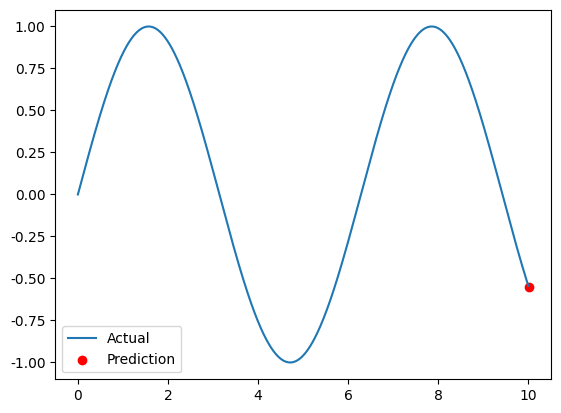

[[0.        ]
 [0.01000984]
 [0.02001868]
 [0.03002552]
 [0.04002934]
 [0.05002916]
 [0.06002396]
 [0.07001275]
 [0.07999452]
 [0.08996827]] 
 0.09993301616303925


In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# 예제 시계열 데이터 생성
def create_dataset(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence) - n_steps):
        seq_x, seq_y = sequence[i:i + n_steps], sequence[i + n_steps]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# 시계열 데이터 (사인파 예제)
time_steps = np.linspace(0, 10, 1000)
sequence = np.sin(time_steps)

# 데이터 준비
n_steps = 10
X, y = create_dataset(sequence, n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))  # GRU 입력을 위해 3D 형태로 변환

# GRU 모델 구성
model = Sequential()
model.add(GRU(50, activation='tanh', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 모델 훈련
model.fit(X, y, epochs=100, verbose=1)

# 예측 및 결과 시각화
x_input = sequence[-n_steps:]  # 마지막 n_steps 데이터를 입력으로 사용
x_input = x_input.reshape((1, n_steps, 1))
yhat = model.predict(x_input, verbose=1)

import matplotlib.pyplot as plt

plt.plot(time_steps, sequence, label='Actual')
plt.scatter(time_steps[-1] + (time_steps[1] - time_steps[0]), yhat, color='red', label='Prediction')
plt.legend()
plt.show()
print(X[0],'\n' , y[0])

Epoch 1/10
3/3 [==============================] - 0s 6ms/step - loss: 7.8013e-06
Epoch 2/10
3/3 [==============================] - 0s 5ms/step - loss: 7.8260e-06
Epoch 3/10
3/3 [==============================] - 0s 5ms/step - loss: 7.7500e-06
Epoch 4/10
3/3 [==============================] - 0s 7ms/step - loss: 7.6583e-06
Epoch 5/10
3/3 [==============================] - 0s 6ms/step - loss: 7.5282e-06
Epoch 6/10
3/3 [==============================] - 0s 5ms/step - loss: 7.5847e-06
Epoch 7/10
3/3 [==============================] - 0s 5ms/step - loss: 7.3884e-06
Epoch 8/10
3/3 [==============================] - 0s 6ms/step - loss: 7.4309e-06
Epoch 9/10
3/3 [==============================] - 0s 6ms/step - loss: 7.4333e-06
Epoch 10/10
1/1 [==============================] - 0s 18ms/step


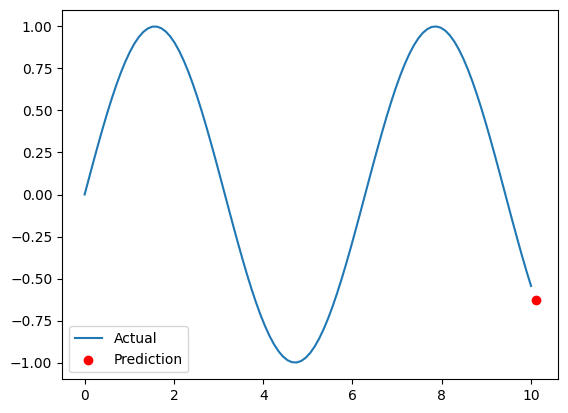

[[0.        ]
 [0.10083842]
 [0.20064886]
 [0.2984138 ]
 [0.39313661]
 [0.48385164]
 [0.56963411]
 [0.64960951]
 [0.72296256]
 [0.78894546]] 
 0.8468855636029834


In [20]:
model.fit(X, y, epochs=10, verbose=1)

# 예측 및 결과 시각화
x_input = sequence[-n_steps:]  # 마지막 n_steps 데이터를 입력으로 사용
x_input = x_input.reshape((1, n_steps, 1))
yhat = model.predict(x_input, verbose=1)

import matplotlib.pyplot as plt

plt.plot(time_steps, sequence, label='Actual')
plt.scatter(time_steps[-1] + (time_steps[1] - time_steps[0]), yhat, color='red', label='Prediction')
plt.legend()
plt.show()
print(X[0],'\n' , y[0])

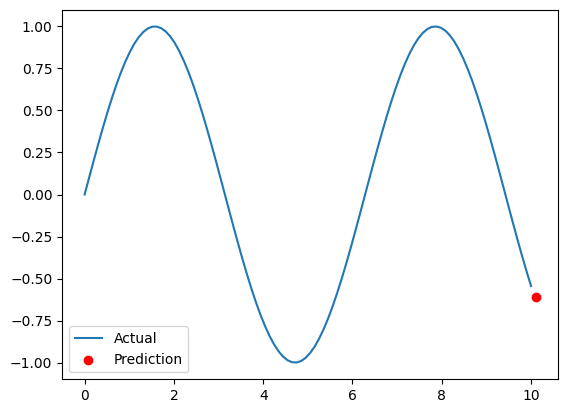

In [13]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# 예제 시계열 데이터 생성
def create_dataset(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence) - n_steps):
        seq_x = sequence[i:i + n_steps]
        seq_y = sequence[i + n_steps]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# 시계열 데이터 생성 (사인파 예제)
time_steps = np.linspace(0, 10, 100)
sequence = np.sin(time_steps)

# 데이터 준비
n_steps = 10
X, y = create_dataset(sequence, n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))  # GRU 입력을 위해 3D 형태로 변환

# GRU 모델 구성
model = Sequential()
model.add(GRU(units=50, activation='tanh', recurrent_activation='sigmoid', 
                recurrent_dropout=0.2, 
               input_shape=(n_steps, 1), return_sequences=False))
model.add(Dense(1))  # 예측할 값의 수
model.compile(optimizer='adam', loss='mse')

# 모델 훈련
model.fit(X, y, epochs=50, verbose=0)

# 예측 및 결과 시각화
x_input = sequence[-n_steps:]  # 마지막 n_steps 데이터를 입력으로 사용
x_input = x_input.reshape((1, n_steps, 1))
yhat = model.predict(x_input, verbose=0)

import matplotlib.pyplot as plt

plt.plot(time_steps, sequence, label='Actual')
plt.scatter(time_steps[-1] + (time_steps[1] - time_steps[0]), yhat, color='red', label='Prediction')
plt.legend()
plt.show()


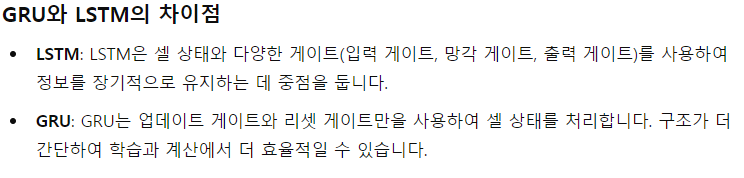

1/1 [==============================] - 0s 194ms/step


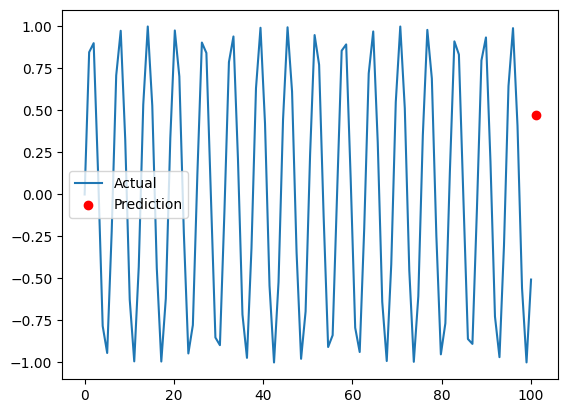

[[0.47109255]]
[[[ 0.        ]
  [ 0.84688556]
  [ 0.90070545]
  [ 0.11106004]
  [-0.7825875 ]
  [-0.94338126]
  [-0.22074597]
  [ 0.7086068 ]
  [ 0.97438499]
  [ 0.32770071]]

 [[ 0.84688556]
  [ 0.90070545]
  [ 0.11106004]
  [-0.7825875 ]
  [-0.94338126]
  [-0.22074597]
  [ 0.7086068 ]
  [ 0.97438499]
  [ 0.32770071]
  [-0.62585878]]

 [[ 0.90070545]
  [ 0.11106004]
  [-0.7825875 ]
  [-0.94338126]
  [-0.22074597]
  [ 0.7086068 ]
  [ 0.97438499]
  [ 0.32770071]
  [-0.62585878]
  [-0.99333304]]

 [[ 0.11106004]
  [-0.7825875 ]
  [-0.94338126]
  [-0.22074597]
  [ 0.7086068 ]
  [ 0.97438499]
  [ 0.32770071]
  [-0.62585878]
  [-0.99333304]
  [-0.43060093]]

 [[-0.7825875 ]
  [-0.94338126]
  [-0.22074597]
  [ 0.7086068 ]
  [ 0.97438499]
  [ 0.32770071]
  [-0.62585878]
  [-0.99333304]
  [-0.43060093]
  [ 0.53536727]]

 [[-0.94338126]
  [-0.22074597]
  [ 0.7086068 ]
  [ 0.97438499]
  [ 0.32770071]
  [-0.62585878]
  [-0.99333304]
  [-0.43060093]
  [ 0.53536727]
  [ 0.99999098]]

 [[-0.2207459

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. 시계열 데이터 생성
def create_dataset(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# 예제 시계열 데이터 (사인파)
time_steps = np.linspace(0, 100, 100)
sequence = np.sin(time_steps)

# 데이터 준비
n_steps = 10
X, y = create_dataset(sequence, n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))  # LSTM 입력을 위해 3D 형태로 변환

# 2. LSTM 모델 구성
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 3. 모델 훈련
model.fit(X, y, epochs=200, verbose=0)

# 4. 예측 및 결과 시각화
x_input = sequence[-n_steps:]  # 마지막 n_steps 데이터를 입력으로 사용
x_input = x_input.reshape((1, n_steps, 1))
yhat = model.predict(x_input, verbose=1)

plt.plot(time_steps, sequence, label='Actual')
plt.scatter(time_steps[-1] + (time_steps[1] - time_steps[0]), yhat, color='red', label='Prediction')
plt.legend()
plt.show()
print(yhat)
print(X)
print(y)


Epoch 1/200
3/3 [==============================] - 1s 11ms/step - loss: 0.2878
Epoch 2/200
3/3 [==============================] - 0s 10ms/step - loss: 0.1267
Epoch 3/200
3/3 [==============================] - 0s 11ms/step - loss: 0.0980
Epoch 4/200
3/3 [==============================] - 0s 9ms/step - loss: 0.0519
Epoch 5/200
3/3 [==============================] - 0s 11ms/step - loss: 0.0167
Epoch 6/200
3/3 [==============================] - 0s 10ms/step - loss: 0.0108
Epoch 7/200
3/3 [==============================] - 0s 10ms/step - loss: 0.0050
Epoch 8/200
3/3 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 9/200
3/3 [==============================] - 0s 9ms/step - loss: 0.0084
Epoch 10/200
3/3 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 11/200
3/3 [==============================] - 0s 10ms/step - loss: 0.0063
Epoch 12/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0036
Epoch 13/200
3/3 [==============================] - 0

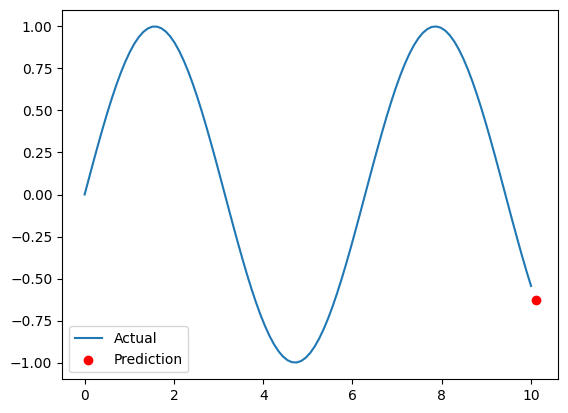

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# 1. 시계열 데이터 생성
def create_dataset(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# 예제 시계열 데이터 (사인파)
time_steps = np.linspace(0, 10, 100)
sequence = np.sin(time_steps)

# 데이터 준비
n_steps = 10
X, y = create_dataset(sequence, n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))

# 2. RNN 모델 구성
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 3. 모델 훈련
model.fit(X, y, epochs=200, verbose=1)

# 4. 예측 및 결과 시각화
x_input = sequence[-n_steps:]  # 마지막 n_steps 데이터를 입력으로 사용
x_input = x_input.reshape((1, n_steps, 1))
yhat = model.predict(x_input, verbose=0)

plt.plot(time_steps, sequence, label='Actual')
plt.scatter(time_steps[-1] + (time_steps[1] - time_steps[0]), yhat, color='red', label='Prediction')
plt.legend()
plt.show()
